In [2]:
!pip install gensim

In [3]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [4]:
import sys
import path
import os

directory = path.Path(os.getcwd()).abspath().dirname()
sys.path.append(directory.parent)

In [6]:
from src.bazinga.preprocessing import *

clean_data = load_data('Clean_Headlines.json')
clean_data

,article_link,headline,is_sarcastic,clean_text
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,versace store clerk sue secret black code mino...
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood w...
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,mom start fear son web series close thing gran...
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,rowling wish snape happy birthday magical way
...,...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0,american politic moral free fall
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0,america good hike
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0,reparation obama
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0,israeli ban target boycott supporter raise ala...


In [7]:
X=clean_data["clean_text"].values

In [8]:
tokens = list(map(lambda doc: doc.split(), X))

In [9]:
tagged_corpus = [
        TaggedDocument(doc, [i])
        for i, doc in enumerate(tokens)
        ]

In [10]:
model = Doc2Vec(
        documents = tagged_corpus,
        vector_size = 100,
        epochs = 20,
        workers = -1
        )

In [11]:
vects = []
for i in range(len(tagged_corpus)):
    vect = model.infer_vector(tagged_corpus[i].words)
    vects.append(vect)
    

In [12]:
import numpy as np

In [13]:
vects_arr=np.array(vects)

In [14]:
vects_arr[0]

array([-3.4306028e-03,  2.9768347e-05,  7.7247736e-04, -1.2560210e-03,
        5.9209467e-04, -3.0756968e-03,  2.6458150e-03, -1.8431926e-03,
       -3.2359604e-03, -2.2090313e-03,  4.5847143e-03, -4.2872727e-03,
       -4.7893710e-03,  3.5997152e-03,  2.7570408e-03,  4.4633835e-03,
        3.5481148e-03, -1.2540353e-03,  3.4087193e-03, -2.2540840e-03,
        3.8493895e-03, -3.4346157e-03,  4.2297686e-03,  1.2035847e-03,
        2.4636923e-03, -3.6217046e-03, -1.0318240e-03,  3.3577657e-03,
        3.3749097e-03,  3.7823939e-03,  1.7541468e-03,  2.7968753e-03,
       -1.8489248e-03, -2.0691282e-03, -2.8221654e-03, -9.3816219e-05,
        3.3312715e-03, -1.2751860e-03,  8.3463371e-04,  6.5241754e-04,
        3.9148736e-03,  3.4846545e-03, -1.2031430e-03, -1.1333504e-03,
       -2.3634576e-03, -2.5206131e-03, -7.0512685e-04,  2.5641411e-03,
       -4.7672568e-03, -1.9183331e-03,  1.3495017e-03,  1.3044662e-03,
       -4.0696752e-03, -2.7082593e-03, -2.3045656e-03,  1.9868696e-03,
      

In [16]:
df_vect = pd.DataFrame(vects_arr)
df_vect["y"] = clean_data["is_sarcastic"].values

In [17]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


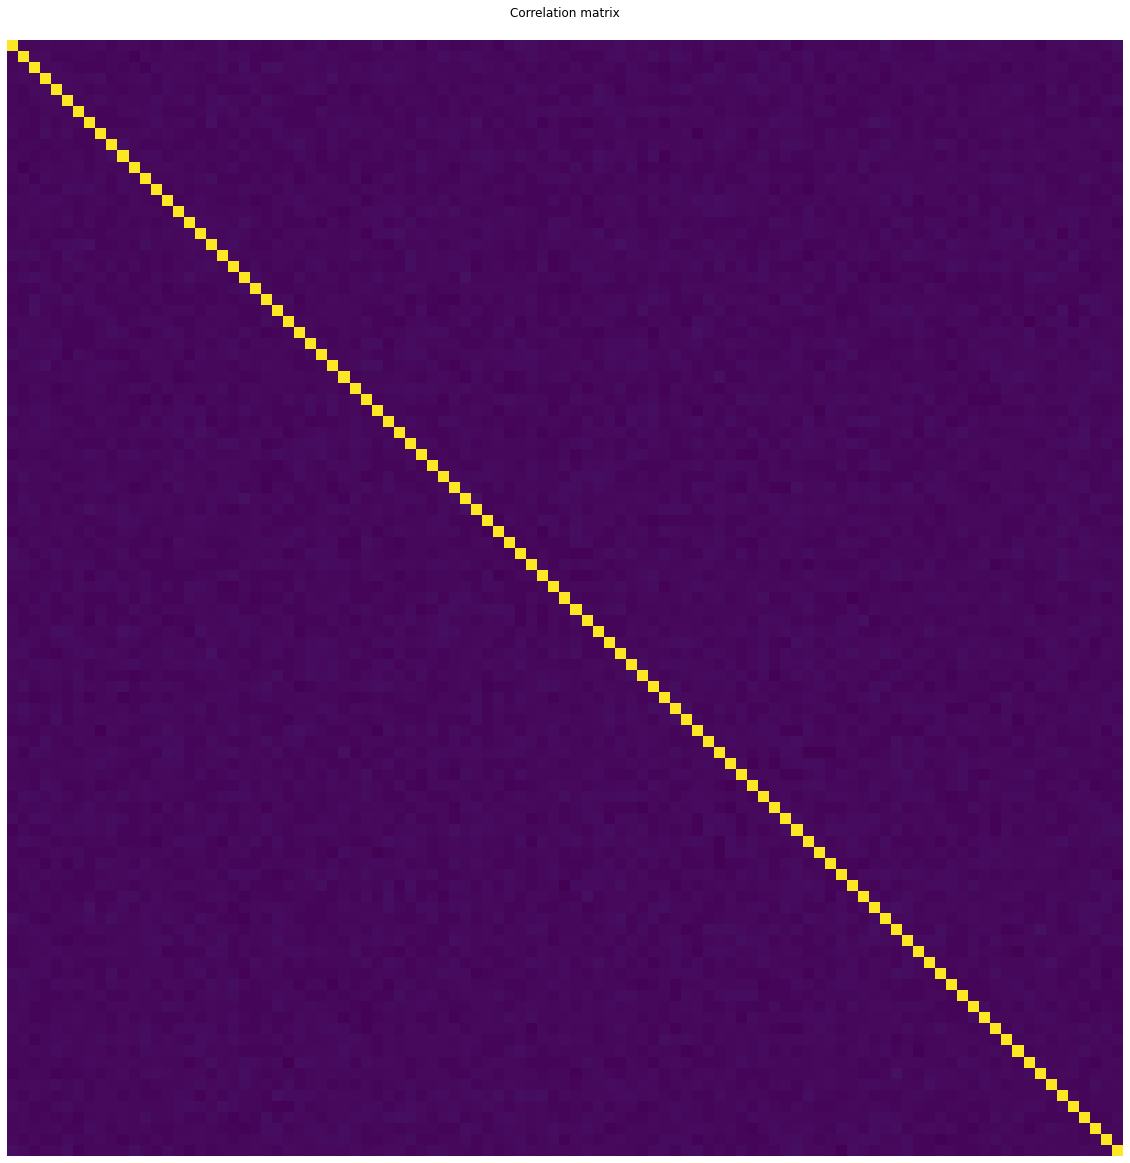

In [18]:
correlation = df_vect.corr()
plt.figure(figsize=(20, 20))
plt.matshow(correlation, aspect="auto", cmap="viridis", fignum=1)
plt.title("Correlation matrix")
plt.axis("off")
plt.show()

In [19]:

%pip install unidecode
%pip install plotly

from unidecode import unidecode
from wordcloud import WordCloud
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from typing import Iterable



Note: you may need to restart the kernel to use updated packages.


"c:\Users\SEBASTIAN" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Note: you may need to restart the kernel to use updated packages.


"c:\Users\SEBASTIAN" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [20]:
def get_bow(corpus: Iterable):
    vect = CountVectorizer(max_features=1000).fit(corpus)
    X = vect.transform(corpus).toarray()
    return X, vect


def get_wordcloud(doc_array: np.ndarray, model: CountVectorizer):
    vocab = model.get_feature_names_out()
    count_dict = dict(zip(vocab, doc_array.sum(axis=0)))
    wc = WordCloud(width=800, height=400, background_color="white")
    wc.generate_from_frequencies(count_dict)
    return wc


def plot_wordcloud(doc_array, model) -> None:
    """Plot wordcloud from bag of words matrix"""
    wc = get_wordcloud(doc_array, model)
    _fig, ax = plt.subplots()
    ax.imshow(wc)
    ax.axis("off")

In [22]:
X=vects_arr
y=clean_data["is_sarcastic"].values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18696, 100) (8013, 100) (18696,) (8013,)


In [26]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

0    10489
1     8207
dtype: int64
0    4496
1    3517
dtype: int64


In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
modelo_dummy = DummyClassifier(strategy="stratified")
modelo_dummy.fit(X, y)
y_pred_dummy=modelo_dummy.predict(X_test)
score_dummy=accuracy_score(y_test,y_pred_dummy)
print(f"La precisión obtenida por el modelo Dummy para la partición de prueba es de: {score_dummy:.4f}. Esta metrica se usará como linea base para comparar el desempeño obtenido en los demás modelos que se desarrollarán para este proyecto")


La precisión obtenida por el modelo Dummy para la partición de prueba es de: 0.5026. Esta metrica se usará como linea base para comparar el desempeño obtenido en los demás modelos que se desarrollarán para este proyecto
